# Mass-metallicity relation

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import linmix
import numpy as np
import emcee
import corner
from astropy.table import Table

## Using the Ma et all 2016 functional form:

12+log(O/H) = $\alpha$ + $\beta$ * log(M$\odot$)

and the linmix package


We also plot results from Zahid 2013

12+log(O/H) = Z$_0$ - log( 1+ (M$\odot$/M$_0$)$^{-\gamma}$ )


<IPython.core.display.Javascript object>


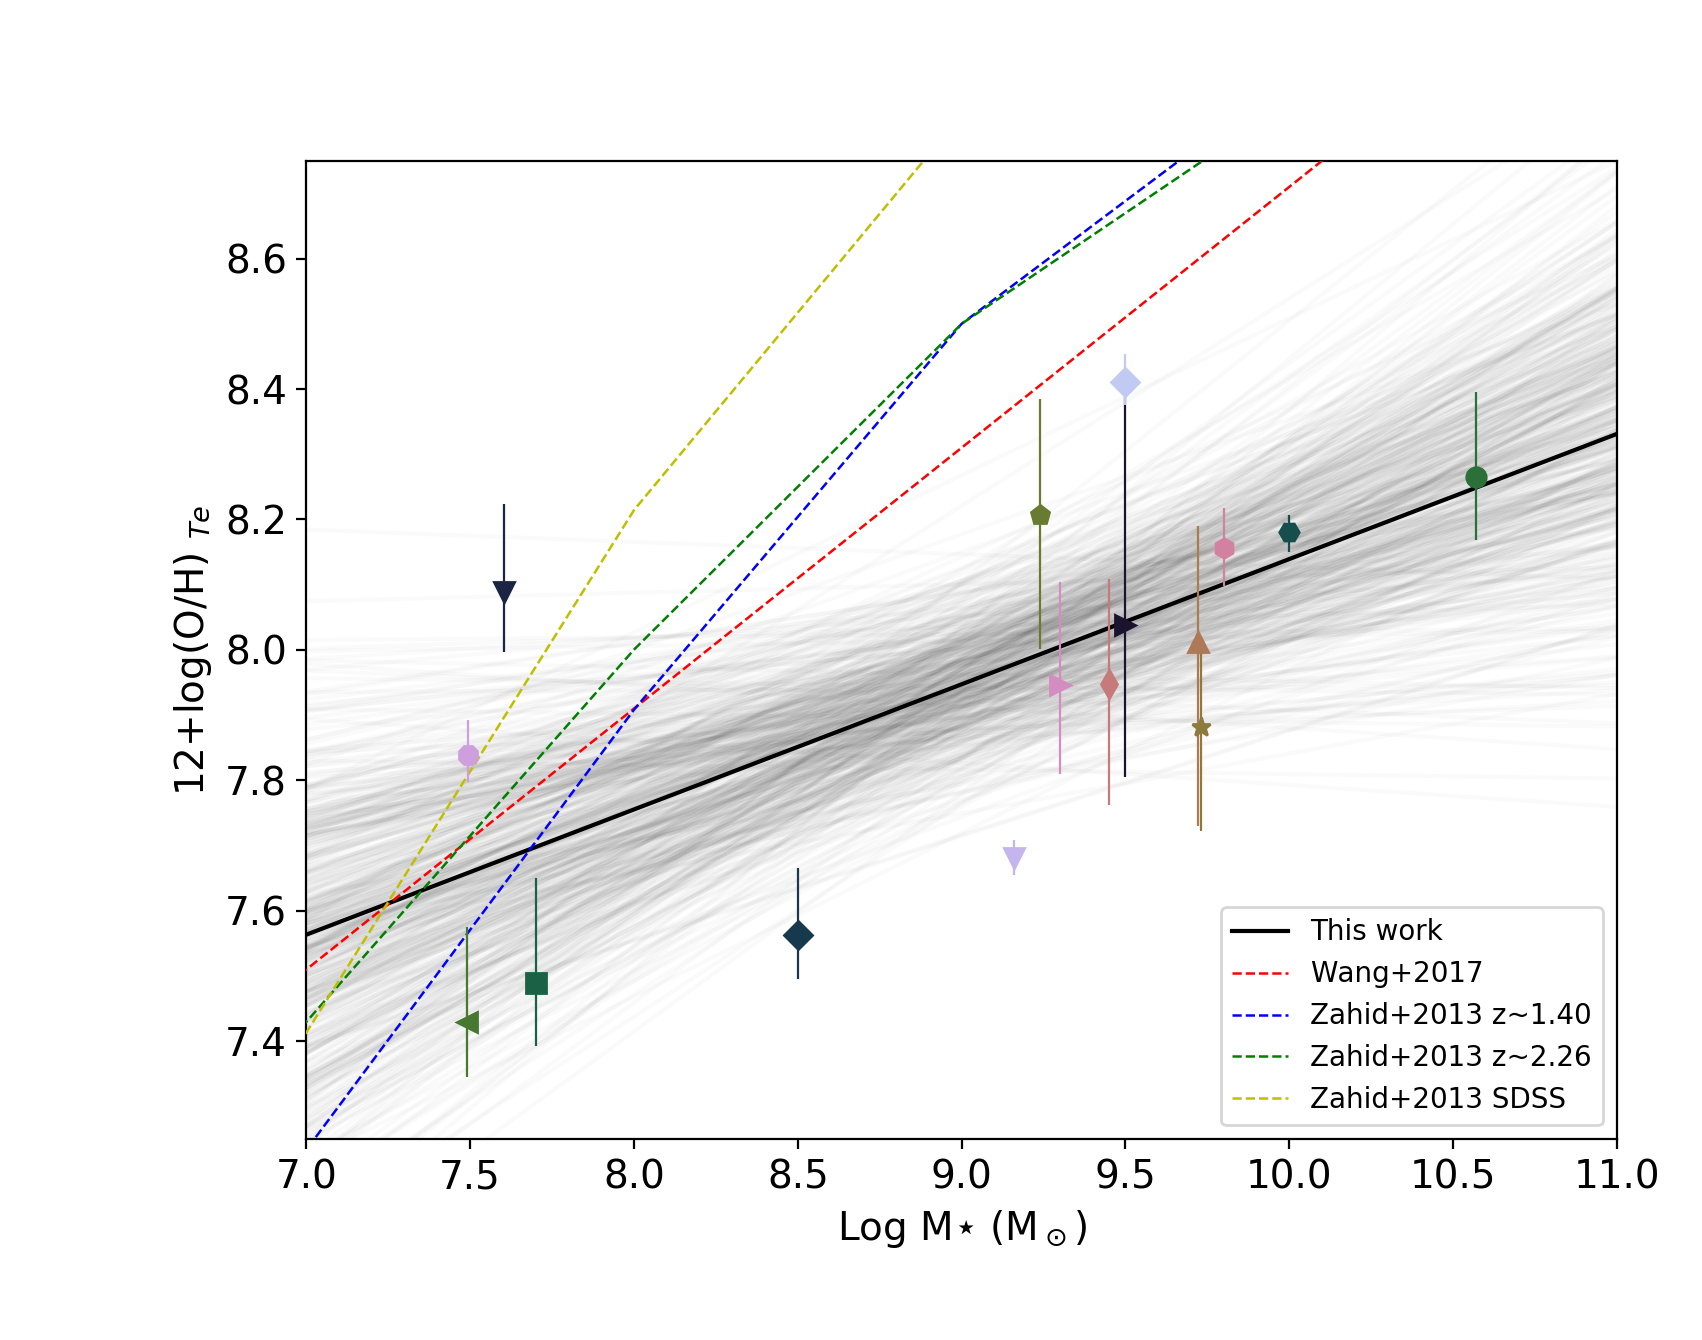

Te
alpha 6.23$^{0.78}_{0.75}$
beta 0.19$^{0.08}_{0.09}$
sigsqr 0.06$^{0.03}_{0.05}$


In [13]:
# Direct metallicity
plt.rcParams.update({'font.size': 14})
properties = Table.read('../Data/galaxy_properties.dat',format='ascii.fixed_width_two_line')
Te_met = Table.read('../TeMethod/direct_metallicity.dat',format='ascii.fixed_width_two_line')
properties.add_index('Name')
Te_met.add_index('Name')

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(properties['Name'])))

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.15,left=0.18,right=0.95)

mass = []
y = []
ysig = []
for i,gal in enumerate(properties):    
    ax.errorbar(gal['LogMass'],Te_met.loc[gal['Name']]["met"],#label=gal['Name'],
                yerr=np.array((Te_met.loc[gal['Name']]["lowmet"],Te_met.loc[gal['Name']]["upmet"])).reshape(2,1),
                color=colors[gal['nb']],marker=gal['marker'],
                markersize=7,elinewidth=0.8, zorder=10)  

    mass.append(gal['LogMass'])
    y.append(Te_met.loc[gal['Name']]["met"])
    ysig.append(Te_met.loc[gal['Name']]["lowmet"] + Te_met.loc[gal['Name']]["upmet"])

# Mass metallicity relation with several sets of metallicity
lm = linmix.LinMix(mass, y, np.zeros_like(mass), ysig=ysig, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 20):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs 
    ax.plot(xs, ys, color='k', alpha=0.02,zorder=1)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs, color='k',zorder=2,label='This work')  

# Wang 2016
ax.plot(xs,4.71 + 0.4*xs, color='r',zorder=3,linestyle='--',label='Wang+2017',linewidth=0.9)  

#Zahid 2013
ax.plot(xs,9.06-np.log10(1. + (10**(xs-9.6))**(-0.7)), color='b',zorder=3,linestyle='--',label='Zahid+2013 z~1.40',linewidth=0.9)  
ax.plot(xs,9.06-np.log10(1. + (10**(xs-9.7))**(-0.6)), color='g',zorder=3,linestyle='--',label='Zahid+2013 z~2.26',linewidth=0.9)  
ax.plot(xs,9.121-np.log10(1. + (10**(xs-8.999))**(-0.85)), color='y',zorder=3,linestyle='--',label='Zahid+2013 SDSS',linewidth=0.9)  



# Print results
print('Te')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{%0.2f}_{%0.2f}$'%(f,mean,mean-low,high-mean))    


# Labels
#ax.set_title('Te Method')
ax.set_ylabel('12+log(O/H) $_{Te}$')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylim(7.25,8.75)
ax.set_xlim(7.0,11.0)

plt.legend(loc=4,fontsize=10)
fig.savefig('/Users/vera/Desktop/Mass_metallicity_direct.pdf')

### We tested:

O32 for all calibrations, because they all have 16 galaxies available and have a very wide range of accurary (M08 -0.25 dex, J15 0.05 dex, C17 0.01 dex)

Also R23 because it is the usual one
                                                                                                             )

## R23

<IPython.core.display.Javascript object>


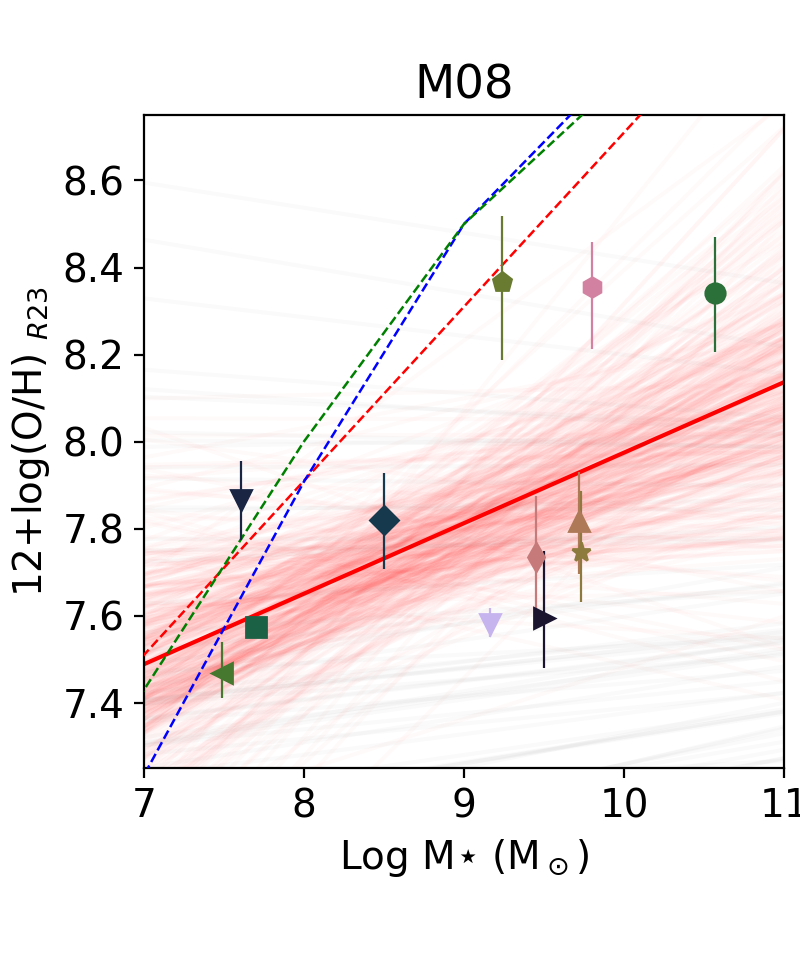

Te for R23 M08
alpha 6.07$^{+0.92}_{-0.99}$
beta 0.20$^{+0.11}_{-0.10}$
sigsqr 0.06$^{+0.03}_{-0.07}$
R23 M08 
alpha 6.36$^{+0.80}_{-0.79}$
beta 0.16$^{+0.09}_{-0.09}$
sigsqr 0.05$^{+0.03}_{-0.08}$


(7.0, 11.0)

In [12]:
# Maiolino 2008 
m08_met = Table.read('Metallicity_Maiolino08_init_O32.dat',format='ascii.fixed_width_two_line')
m08_met.add_index('Name')

## colors and markers
m08_met.remove_rows([16,17,18]) # MEAN, STD, MAE

# Clean from nans
good_gal = m08_met['Name'][np.where(np.isfinite(m08_met['R23']))]

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.2,left=0.18,right=0.98)

mass = []
y = []
ysig = []
y_Te = []
ysig_Te = []
for name in good_gal:
    ax.errorbar(properties.loc[name]['LogMass'],m08_met.loc[name]["R23"],#label=gal['Name'],
                yerr=np.array((m08_met.loc[name]["lowR23"],m08_met.loc[name]["upR23"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=7,elinewidth=0.8, zorder=10)
    #ax.errorbar(properties.loc[name]['LogMass'],Te_met.loc[name]["met"],#label=gal['Name'],
    #            yerr=np.array((Te_met.loc[name]["lowmet"],Te_met.loc[name]["upmet"])).reshape(2,1),
    #            color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
    #            markersize=10,elinewidth=0.8, zorder=10,alpha=0.5)

    
    mass.append(properties.loc[name]['LogMass'])
    y_Te.append(Te_met.loc[name]["met"])
    ysig_Te.append(Te_met.loc[name]["lowmet"] + Te_met.loc[name]["upmet"])
    y.append(m08_met.loc[name]["R23"])
    ysig.append(m08_met.loc[name]["upR23"] + m08_met.loc[name]["lowR23"])


# Mass metallicity relation with direct metallicity but only the subset also used in M08 
lm = linmix.LinMix(mass, y_Te, np.zeros_like(mass), ysig=ysig_Te, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* (xs - 10.)
    ax.plot(xs, ys, color='k', alpha=0.02,zorder=3)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*(xs - 10.),color='k',zorder=2)  
print('Te for R23 M08')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{+%0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      
   
    
# Mass metallicity for R23
lm = linmix.LinMix(mass, y, np.zeros_like(mass), ysig=ysig, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs
    ax.plot(xs, ys, color='r', alpha=0.02,zorder=1)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs,color='r',zorder=2)  
print('R23 M08 ')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{+%0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      

    
# Wang 2016
ax.plot(xs,4.71 + 0.4*xs, color='r',zorder=3,linestyle='--',label='Wang+2017',linewidth=0.9)  

#Zahid 2013
ax.plot(xs,9.06-np.log10(1. + (10**(xs-9.6))**(-0.7)), color='b',zorder=3,linestyle='--',label='Zahid+2013 z~1.40',linewidth=0.9)  
ax.plot(xs,9.06-np.log10(1. + (10**(xs-9.7))**(-0.6)), color='g',zorder=3,linestyle='--',label='Zahid+2013 z~2.26',linewidth=0.9)  


# Labels
ax.set_title('M08')
ax.set_ylabel('12+log(O/H) $_{R23}$')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylim(7.25,8.75)
ax.set_xlim(7.0,11.0)

#fig.savefig('/Users/vera/Desktop/Mass_metallicity_maiolino_R23.pdf')

<IPython.core.display.Javascript object>


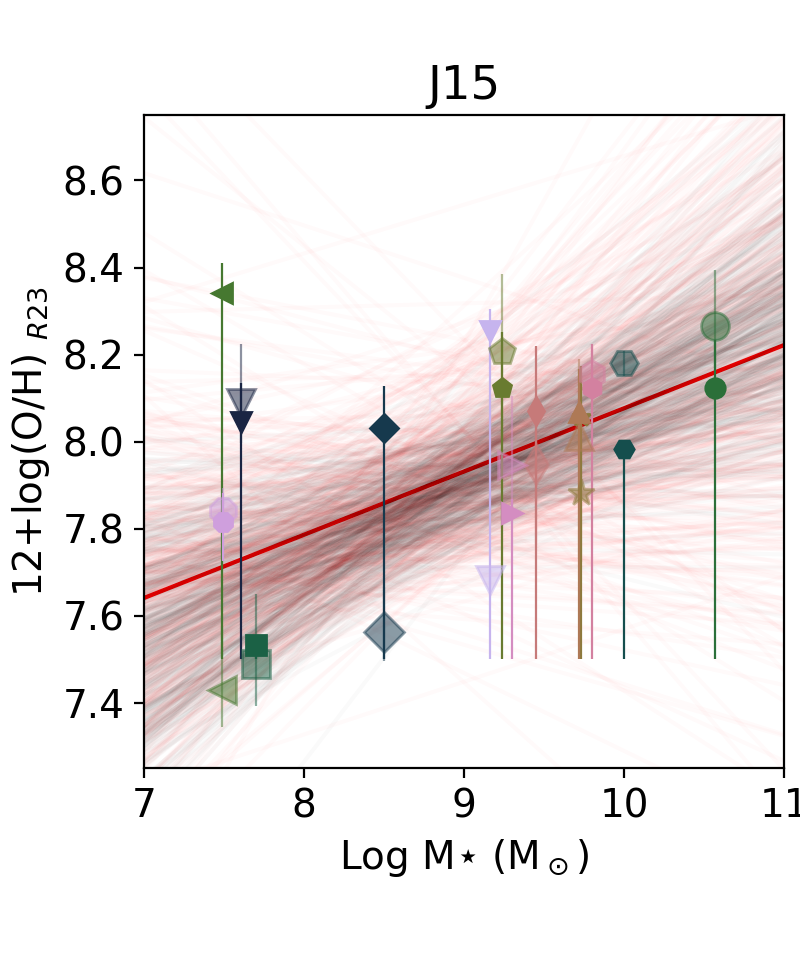

Te for R23 J15
alpha 6.39$^{+0.71}_{-0.71}$
beta 0.17$^{+0.08}_{-0.08}$
sigsqr 0.05$^{+0.02}_{-0.05}$
R23 J15 
alpha 6.58$^{+1.22}_{-1.29}$
beta 0.15$^{+0.15}_{-0.14}$
sigsqr 0.07$^{+0.05}_{-0.12}$


(7.0, 11.0)

In [18]:
# Jones 2015
j15_met = Table.read('Metallicity_Jones15_init_O32.dat',format='ascii.fixed_width_two_line')
j15_met.add_index('Name')

## colors and markers
j15_met.remove_rows([0,16,17,18]) # CSWA20, MEAN, STD, MAE

# Clean from nans
good_gal = j15_met['Name'][np.where(np.isfinite(j15_met['R23']))]

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.2,left=0.18,right=0.98)

mass = []
y = []
ysig = []
y_Te = []
ysig_Te = []
for name in good_gal:
    ax.errorbar(properties.loc[name]['LogMass'],j15_met.loc[name]["R23"],#label=gal['Name'],
                yerr=np.array((j15_met.loc[name]["lowR23"],j15_met.loc[name]["upR23"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=7,elinewidth=0.8, zorder=10)
    ax.errorbar(properties.loc[name]['LogMass'],Te_met.loc[name]["met"],#label=gal['Name'],
                yerr=np.array((Te_met.loc[name]["lowmet"],Te_met.loc[name]["upmet"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=10,elinewidth=0.8, zorder=10,alpha=0.5)

    
    mass.append(properties.loc[name]['LogMass'])
    y_Te.append(Te_met.loc[name]["met"])
    ysig_Te.append(Te_met.loc[name]["lowmet"] + Te_met.loc[name]["upmet"])
    y.append(j15_met.loc[name]["R23"])
    ysig.append(j15_met.loc[name]["upR23"] + j15_met.loc[name]["lowR23"])


# Mass metallicity relation with direct metallicity but only the subset also used in M08 
lm = linmix.LinMix(mass, y_Te, np.zeros_like(mass), ysig=ysig_Te, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs
    ax.plot(xs, ys, color='k', alpha=0.02,zorder=3)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*(xs - 10.),color='k',zorder=2)  
print('Te for R23 J15')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{+%0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      
   
    
# Mass metallicity for R23
lm = linmix.LinMix(mass, y, np.zeros_like(mass), ysig=ysig, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs
    ax.plot(xs, ys, color='r', alpha=0.02,zorder=1)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs,color='r',zorder=2)  
print('R23 J15 ')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{+%0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      

# Labels
ax.set_title('J15')
ax.set_ylabel('12+log(O/H) $_{R23}$')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylim(7.25,8.75)
ax.set_xlim(7.0,11.0)

#fig.savefig('/Users/vera/Desktop/Mass_metallicity_jones_R23.pdf')

<IPython.core.display.Javascript object>


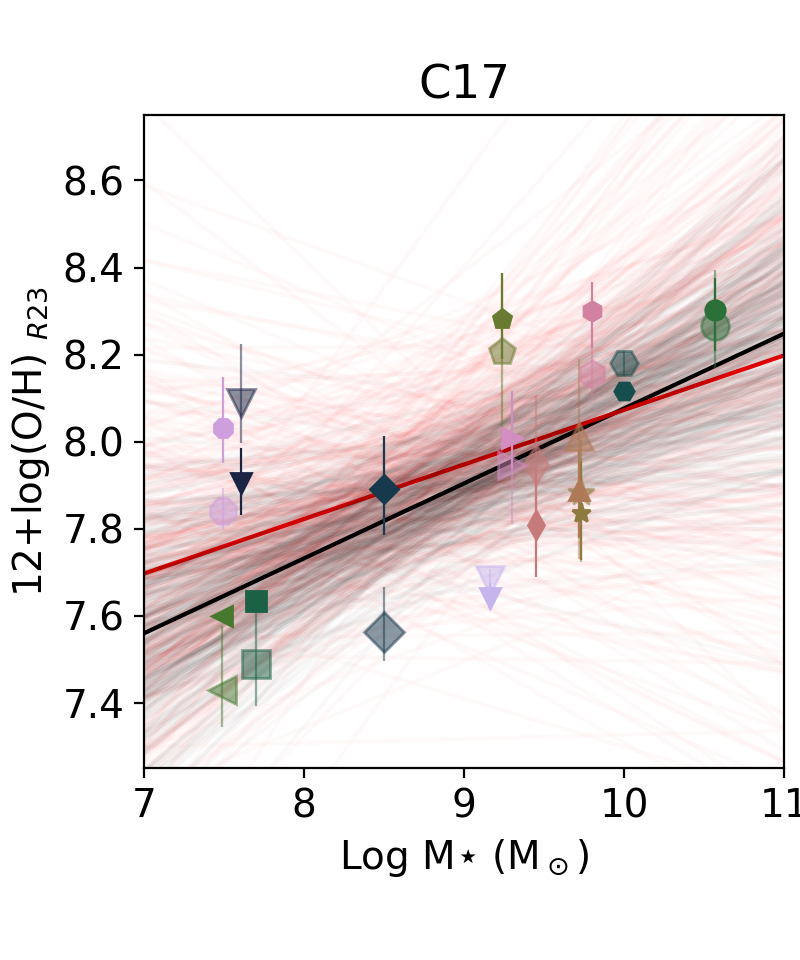

Te for R23 C17
alpha 6.36$^{+0.72}_{-0.70}$
beta 0.17$^{+0.08}_{-0.08}$
sigsqr 0.05$^{+0.02}_{-0.05}$
R23 C17 
alpha 6.81$^{+1.33}_{1.34}$
beta 0.13$^{+0.16}_{0.16}$
sigsqr 0.08$^{+0.05}_{0.13}$


(7.0, 11.0)

In [19]:
# Curtis 2017
c17_met = Table.read('Metallicity_Curti17_init_O32.dat',format='ascii.fixed_width_two_line')
c17_met.add_index('Name')

## colors and markers
c17_met.remove_rows([0,16,17,18]) # CSWA20, MEAN, STD, MAE

# Clean from nans
good_gal = c17_met['Name'][np.where(np.isfinite(j15_met['R23']))]

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.2,left=0.18,right=0.98)

mass = []
y = []
ysig = []
y_Te = []
ysig_Te = []
for name in good_gal:
    ax.errorbar(properties.loc[name]['LogMass'],c17_met.loc[name]["R23"],#label=gal['Name'],
                yerr=np.array((c17_met.loc[name]["lowR23"],c17_met.loc[name]["upR23"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=7,elinewidth=0.8, zorder=10)
    ax.errorbar(properties.loc[name]['LogMass'],Te_met.loc[name]["met"],#label=gal['Name'],
                yerr=np.array((Te_met.loc[name]["lowmet"],Te_met.loc[name]["upmet"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=10,elinewidth=0.8, zorder=10,alpha=0.5)

    
    mass.append(properties.loc[name]['LogMass'])
    y_Te.append(Te_met.loc[name]["met"])
    ysig_Te.append(Te_met.loc[name]["lowmet"] + Te_met.loc[name]["upmet"])
    y.append(c17_met.loc[name]["R23"])
    ysig.append(c17_met.loc[name]["upR23"] + j15_met.loc[name]["lowR23"])


# Mass metallicity relation with direct metallicity but only the subset also used in M08 
lm = linmix.LinMix(mass, y_Te, np.zeros_like(mass), ysig=ysig_Te, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs 
    ax.plot(xs, ys, color='k', alpha=0.02,zorder=3)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs ,color='k',zorder=2)  
print('Te for R23 C17')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{%+0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      
   
    
# Mass metallicity for R23
lm = linmix.LinMix(mass, y, np.zeros_like(mass), ysig=ysig, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs 
    ax.plot(xs, ys, color='r', alpha=0.02,zorder=1)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs ,color='r',zorder=2)  
print('R23 C17 ')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{%+0.2f}_{%-0.2f}$'%(f,mean,mean-low,high-mean))      

# Labels
ax.set_title('C17')
ax.set_ylabel('12+log(O/H) $_{R23}$')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylim(7.25,8.75)
ax.set_xlim(7.0,11.0)

#fig.savefig('/Users/vera/Desktop/Mass_metallicity_curti_R23.pdf')

## O32

<IPython.core.display.Javascript object>


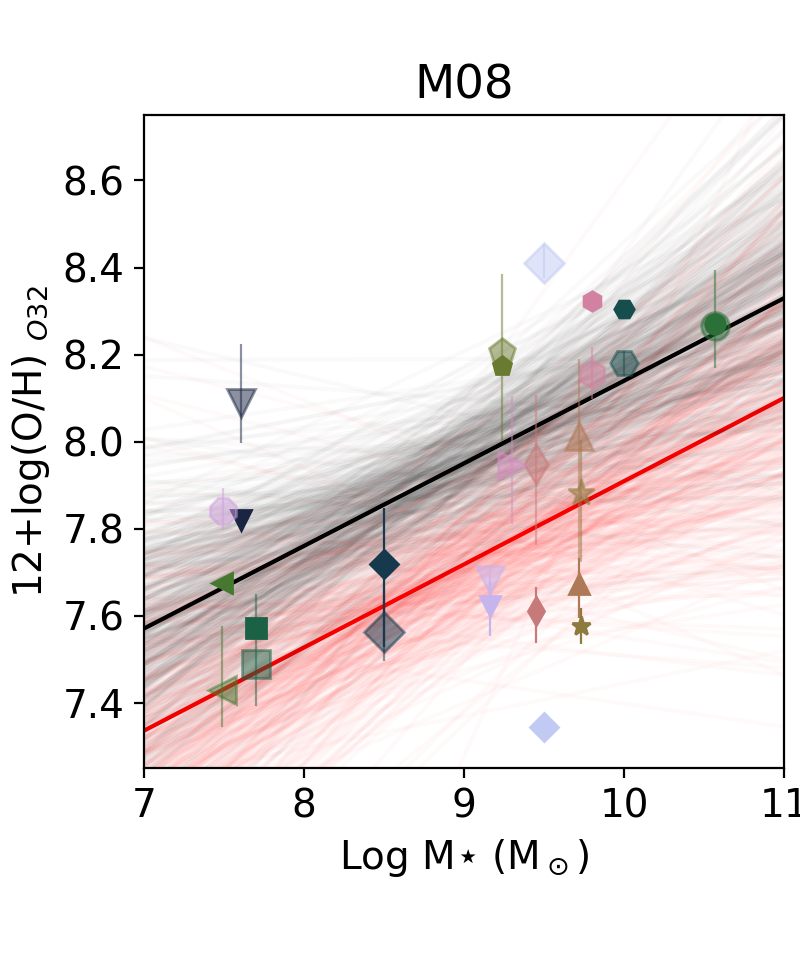

Te for O32 M08
alpha 6.24$^{+0.76}_{-0.77}$
beta 0.19$^{+0.09}_{-0.08}$
sigsqr 0.06$^{+0.03}_{-0.05}$
O32 M08 
alpha 5.99$^{+1.04}_{-1.06}$
beta 0.19$^{+0.12}_{-0.12}$
sigsqr 0.18$^{+0.06}_{-0.12}$


(7.0, 11.0)

In [21]:
# Maiolino 2008
m08_met = Table.read('Metallicity_Maiolino08_init_O32.dat',format='ascii.fixed_width_two_line')
m08_met.add_index('Name')

## colors and markers
m08_met.remove_rows([0,16,17,18]) # CSWA20, MEAN, STD, MAE

# Clean from nans
good_gal = m08_met['Name'][np.where(np.isfinite(m08_met['O32']))]

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.2,left=0.18,right=0.98)

mass = []
y = []
ysig = []
y_Te = []
ysig_Te = []
for name in good_gal:
    ax.errorbar(properties.loc[name]['LogMass'],m08_met.loc[name]["O32"],#label=gal['Name'],
                yerr=np.array((m08_met.loc[name]["lowO32"],m08_met.loc[name]["upO32"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=7,elinewidth=0.8, zorder=10)
    ax.errorbar(properties.loc[name]['LogMass'],Te_met.loc[name]["met"],#label=gal['Name'],
                yerr=np.array((Te_met.loc[name]["lowmet"],Te_met.loc[name]["upmet"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=10,elinewidth=0.8, zorder=10,alpha=0.5)

    
    mass.append(properties.loc[name]['LogMass'])
    y_Te.append(Te_met.loc[name]["met"])
    ysig_Te.append(Te_met.loc[name]["lowmet"] + Te_met.loc[name]["upmet"])
    y.append(m08_met.loc[name]["O32"])
    ysig.append(m08_met.loc[name]["upO32"] + m08_met.loc[name]["lowO32"])


    
# Mass metallicity for O32
lm = linmix.LinMix(mass, y, np.zeros_like(mass), ysig=ysig, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs 
    ax.plot(xs, ys, color='r', alpha=0.02,zorder=1)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs ,color='r',zorder=2)  
print('O32 M08 ')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{+%0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      

# Labels
ax.set_title('M08')
ax.set_ylabel('12+log(O/H) $_{O32}$')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylim(7.25,8.75)
ax.set_xlim(7.0,11.0)

#fig.savefig('/Users/vera/Desktop/Mass_metallicity_maiolino_O32.pdf')

<IPython.core.display.Javascript object>


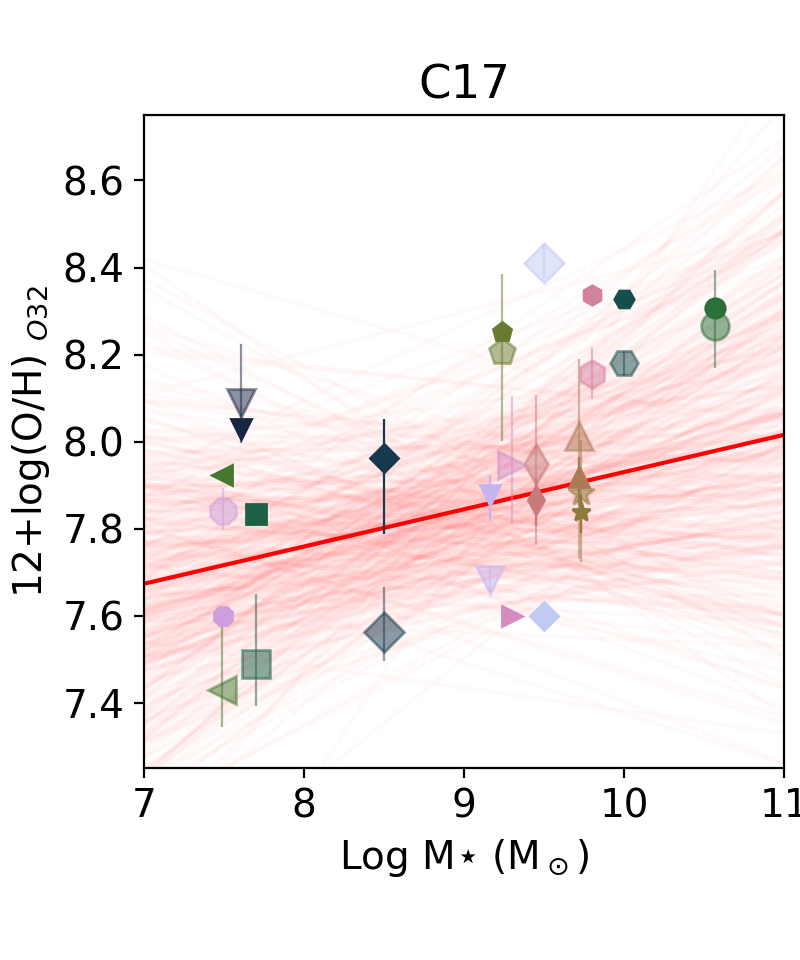

O32 C17 
alpha 7.04$^{+1.11}_{-1.15}$
beta 0.09$^{+0.13}_{-0.13}$
sigsqr 0.04$^{+0.03}_{-0.08}$


(7.0, 11.0)

In [24]:
# Curti 2017
c17_met = Table.read('Metallicity_Curti17_init_O32.dat',format='ascii.fixed_width_two_line')
c17_met.add_index('Name')

## colors and markers
c17_met.remove_rows([0,16,17,18]) # CSWA20, MEAN, STD, MAE

# Clean from nans
good_gal = c17_met['Name'][np.where(np.isfinite(j15_met['O32']))]

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.2,left=0.18,right=0.98)

mass = []
y = []
ysig = []
y_Te = []
ysig_Te = []
for name in good_gal:
    ax.errorbar(properties.loc[name]['LogMass'],c17_met.loc[name]["O32"],#label=gal['Name'],
                yerr=np.array((c17_met.loc[name]["lowO32"],c17_met.loc[name]["upO32"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=7,elinewidth=0.8, zorder=10)
    ax.errorbar(properties.loc[name]['LogMass'],Te_met.loc[name]["met"],#label=gal['Name'],
                yerr=np.array((Te_met.loc[name]["lowmet"],Te_met.loc[name]["upmet"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=10,elinewidth=0.8, zorder=10,alpha=0.5)

    
    mass.append(properties.loc[name]['LogMass'])
    y_Te.append(Te_met.loc[name]["met"])
    ysig_Te.append(Te_met.loc[name]["lowmet"] + Te_met.loc[name]["upmet"])
    y.append(c17_met.loc[name]["O32"])
    ysig.append(c17_met.loc[name]["upO32"] + j15_met.loc[name]["lowO32"])

   
    
# Mass metallicity for R23
lm = linmix.LinMix(mass, y, np.zeros_like(mass), ysig=ysig, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs 
    ax.plot(xs, ys, color='r', alpha=0.02,zorder=1)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs,color='r',zorder=2)  
print('O32 C17 ')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{+%0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      

# Labels
ax.set_title('C17')
ax.set_ylabel('12+log(O/H) $_{O32}$')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylim(7.25,8.75)
ax.set_xlim(7.0,11.0)

#fig.savefig('/Users/vera/Desktop/Mass_metallicity_curti_O32.pdf')

<IPython.core.display.Javascript object>


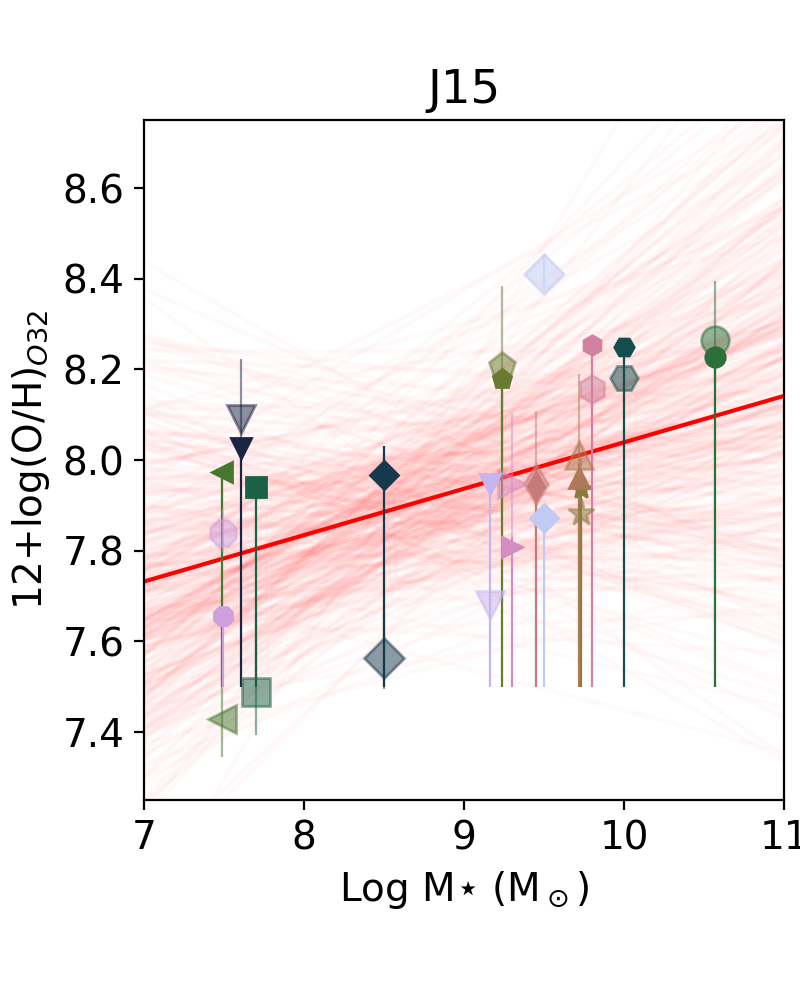

O32 J15 
alpha 6.99$^{+1.07}_{-1.12}$
beta 0.10$^{+0.13}_{-0.12}$
sigsqr 0.04$^{+0.03}_{-0.07}$


(7.0, 11.0)

In [26]:
# Compare with previous estimations
j15_met = Table.read('Metallicity_Jones15_init_O32.dat',format='ascii.fixed_width_two_line')
j15_met.add_index('Name')

## colors and markers
j15_met.remove_rows([0,16,17,18]) # CSWA20, MEAN, STD, MAE

# Clean from nans
good_gal = j15_met['Name'][np.where(np.isfinite(j15_met['O32']))]

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,5))
fig.subplots_adjust(bottom=0.2,left=0.18,right=0.98)

mass = []
y = []
ysig = []
y_Te = []
ysig_Te = []
for name in good_gal:
    ax.errorbar(properties.loc[name]['LogMass'],j15_met.loc[name]["O32"],#label=gal['Name'],
                yerr=np.array((j15_met.loc[name]["lowO32"],j15_met.loc[name]["upO32"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=7,elinewidth=0.8, zorder=10)
    ax.errorbar(properties.loc[name]['LogMass'],Te_met.loc[name]["met"],#label=gal['Name'],
                yerr=np.array((Te_met.loc[name]["lowmet"],Te_met.loc[name]["upmet"])).reshape(2,1),
                color=colors[properties.loc[name]['nb']],marker=properties.loc[name]['marker'],
                markersize=10,elinewidth=0.8, zorder=10,alpha=0.5)

    
    mass.append(properties.loc[name]['LogMass'])
    y.append(j15_met.loc[name]["O32"])
    ysig.append(j15_met.loc[name]["upO32"] + j15_met.loc[name]["lowO32"])
    
   
    
# Mass metallicity for R23
lm = linmix.LinMix(mass, y, np.zeros_like(mass), ysig=ysig, K=2)
lm.run_mcmc(silent=True)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(6.0,13.0) 
    ys = lm.chain[i]['alpha'] +  lm.chain[i]['beta']* xs 
    ax.plot(xs, ys, color='r', alpha=0.02,zorder=1)
ax.plot(xs,np.mean(lm.chain['alpha']) + np.mean(lm.chain['beta'])*xs,color='r',zorder=2)  
print('O32 J15 ')
for f in ['alpha','beta','sigsqr']:
    mean, low, high = np.percentile(lm.chain[f],(50,16,84))
    print('%s %0.2f$^{+%0.2f}_{-%0.2f}$'%(f,mean,mean-low,high-mean))      

# Labels
ax.set_title('J15')
ax.set_ylabel('12+log(O/H)$_{O32}$')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylim(7.25,8.75)
ax.set_xlim(7.0,11.0)

#fig.savefig('/Users/vera/Desktop/Mass_metallicity_jones_O32.pdf')

### Predicted evolution of the mass metallicity relation
From Ma+16

<IPython.core.display.Javascript object>


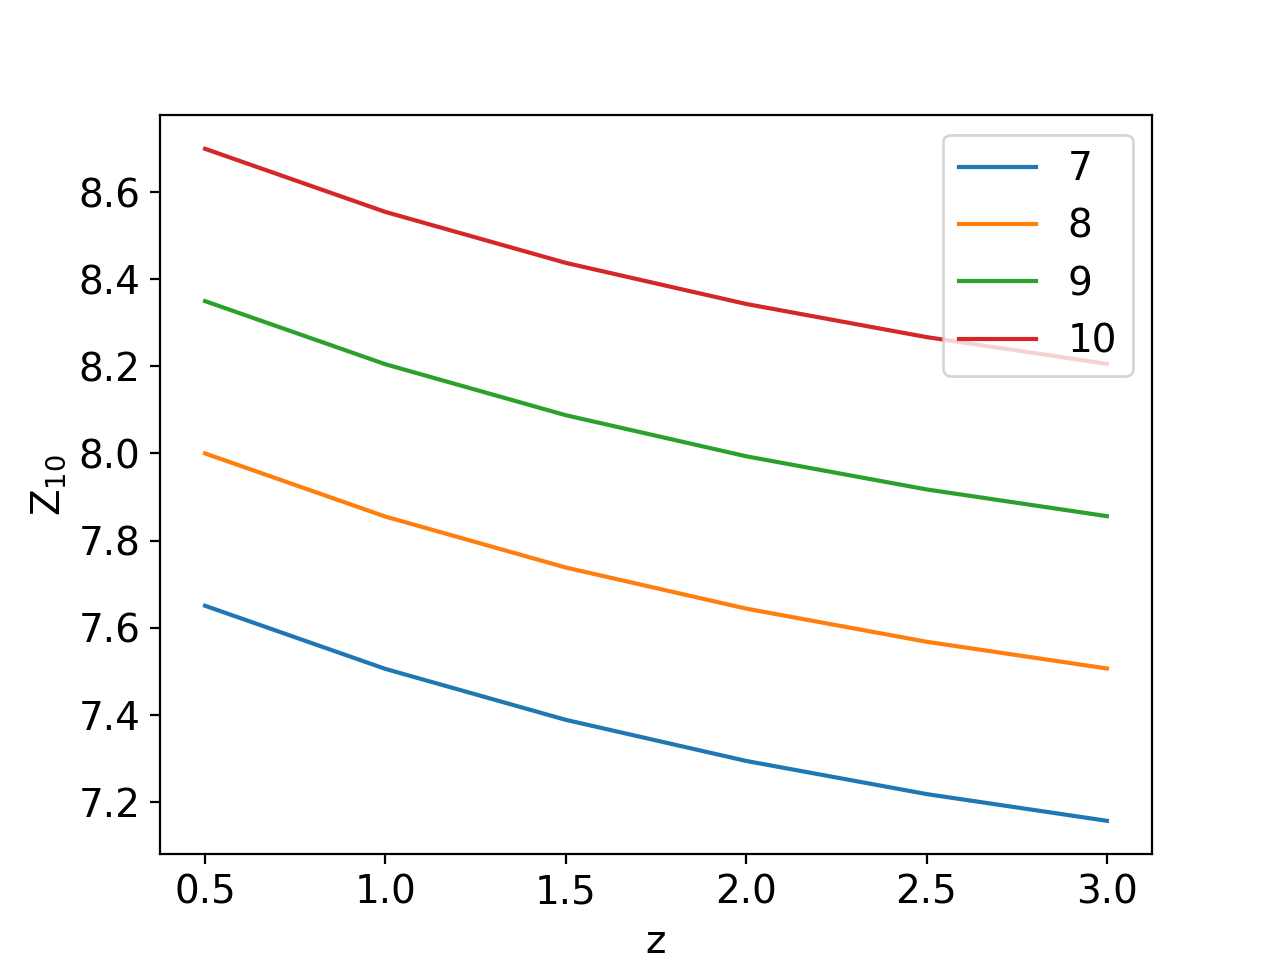

('0.0-0.5', -0.17991646063508604, 10.0)
('0.5-1.0', -0.14511008127223057, 10.0)
('1.0-1.5', -0.11703729393355289, 10.0)
('1.5-2.0', -0.094395427603624071, 10.0)
('2.0-2.5', -0.07613382412558245, 10.0)
('2.5-3.0', -0.061405084156454848, 10.0)
(10, -0.53645926344449357)


In [43]:
# Evolution of Z_10 with redshift
def MZR_Ma16(z,mass):
    #in Ma they use Zsun = 9. 
    return 0.35*(mass - 10.) + 0.93*np.exp(-0.43*z) - 1.05 + 9


mass = np.arange(7,11)

fig, ax = plt.subplots(1,1)
for m in mass:
    plt.plot(np.arange(0.5,3.5,0.5), MZR_Ma16(np.arange(0.5,3.5,0.5),m),label=m)

ax.set_ylabel('Z$_{10}$')
ax.set_xlabel('z')
plt.legend()

for z in np.arange(0.5,3.5,0.5):
    print('%0.1f-%0.1f'%(z-0.5,z),MZR_Ma16(z,10)-MZR_Ma16(z-0.5,10),10.)

print(m,MZR_Ma16(2.0,8)-MZR_Ma16(0,8))

# Using the Zahid 2013 formulation

12+log(O/H) = Z$_O$ - log (1- (M$\odot$/M$_0$)$^{-\gamma}$ )

and emcee: http://dfm.io/emcee/current/user/line/

In [5]:
# Define prior and likelihood
def lnprior(par):
    z0,m0,g  = par 
    # Only using uniform priors
    if 7.0 < z0 < 11.0 and 7.0 < m0 < 11.0 and 0.0 < g < 2.0:
        return 0.0
    return -np.inf

def lnlike(par, mass, met, met_err):
    z0,m0,g  = par
    met_model = z0 - np.log10(1. + (10**mass/m0)**(-g))
    inv_sigma2 = 1.0/(met_err**2)
    return -0.5*(np.nansum((y-met_model)**2*inv_sigma2 - np.log(inv_sigma2)))


def lnprob(par, mass, met, meterr):
    z0,m0,g  = par
    lp = lnprior(par)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(par, mass, met, meterr)

ndim, nwalkers = 3, 500

<IPython.core.display.Javascript object>


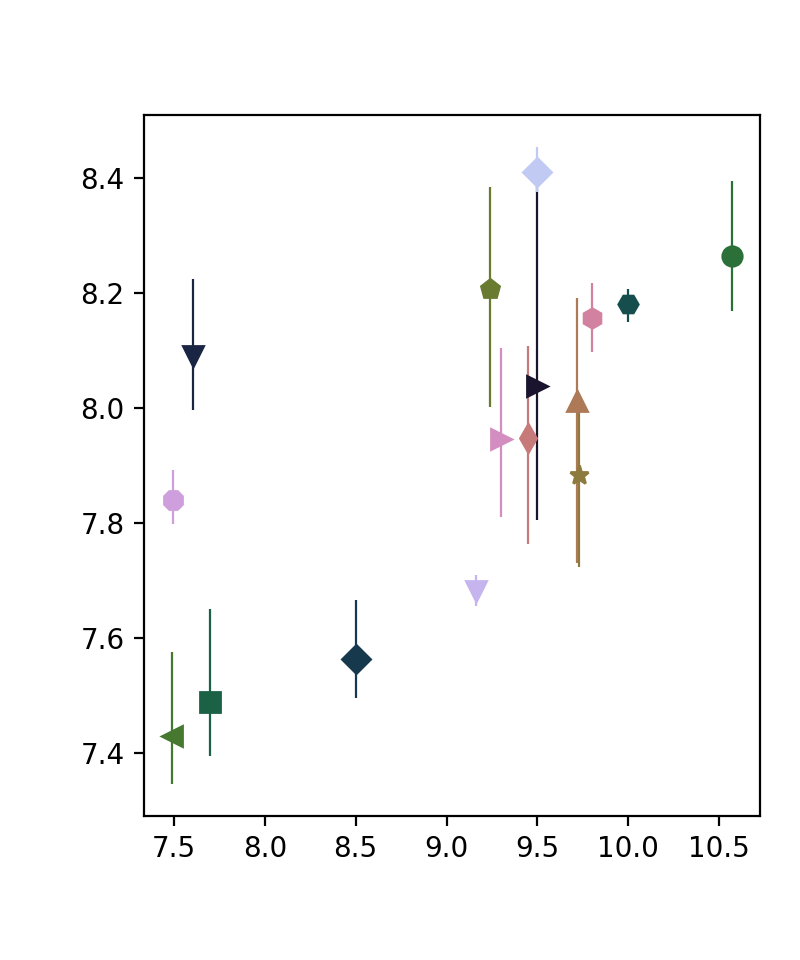

In [6]:
## direct metallicity
properties = Table.read('../Data/galaxy_properties.dat',format='ascii.fixed_width_two_line')
Te_met = Table.read('../TeMethod/direct_metallicity.dat',format='ascii.fixed_width_two_line')
properties.add_index('Name')
Te_met.add_index('Name')

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(properties['Name'])))

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.15,left=0.18,right=0.95)

x = []
y = []
y_err = []
for i,gal in enumerate(properties):    
    ax.errorbar(gal['LogMass'],Te_met.loc[gal['Name']]["met"],#label=gal['Name'],
                yerr=np.array((Te_met.loc[gal['Name']]["lowmet"],Te_met.loc[gal['Name']]["upmet"])).reshape(2,1),
                color=colors[gal['nb']],marker=gal['marker'],
                markersize=7,elinewidth=0.8, zorder=10)  

    x.append(gal['LogMass'])
    y.append(Te_met.loc[gal['Name']]["met"])
    y_err.append(np.mean((Te_met.loc[gal['Name']]["lowmet"],Te_met.loc[gal['Name']]["upmet"])))

# make sure all  is an array
x = np.array(x)
y = np.array(y)
y_err = np.array(y_err)


# Initialise walkers
p0 = [np.array((x,y,z)) for x,y,z in zip(np.random.uniform(low=8.5, high=10.0, size=nwalkers),
                                         np.random.uniform(low=8.5, high=10.0, size=nwalkers),
                                         np.random.uniform(low=0.2, high=1.0, size=nwalkers))]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, y_err))        
out = sampler.run_mcmc(p0, 5000)

<IPython.core.display.Javascript object>


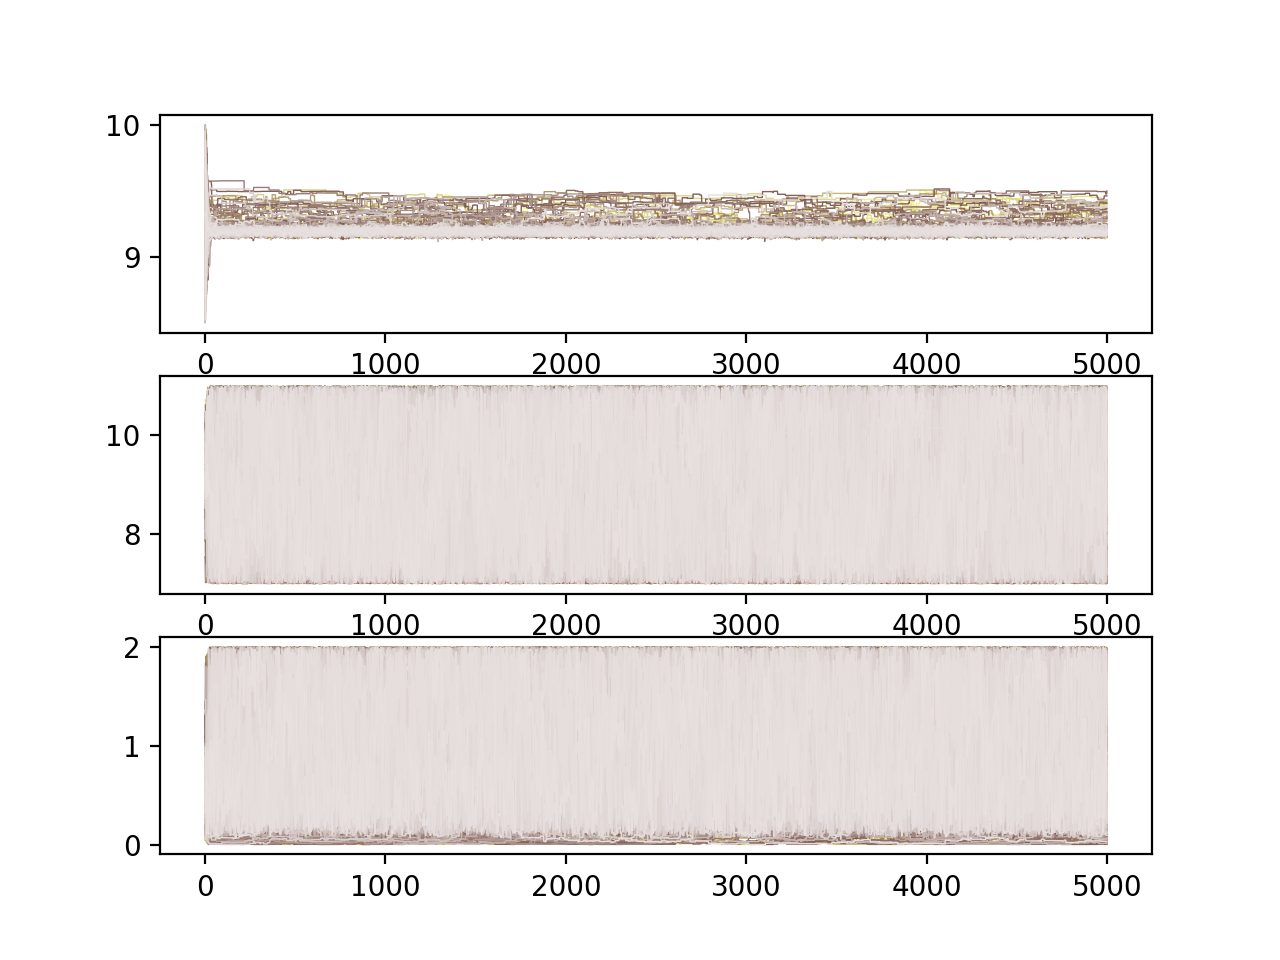

<IPython.core.display.Javascript object>


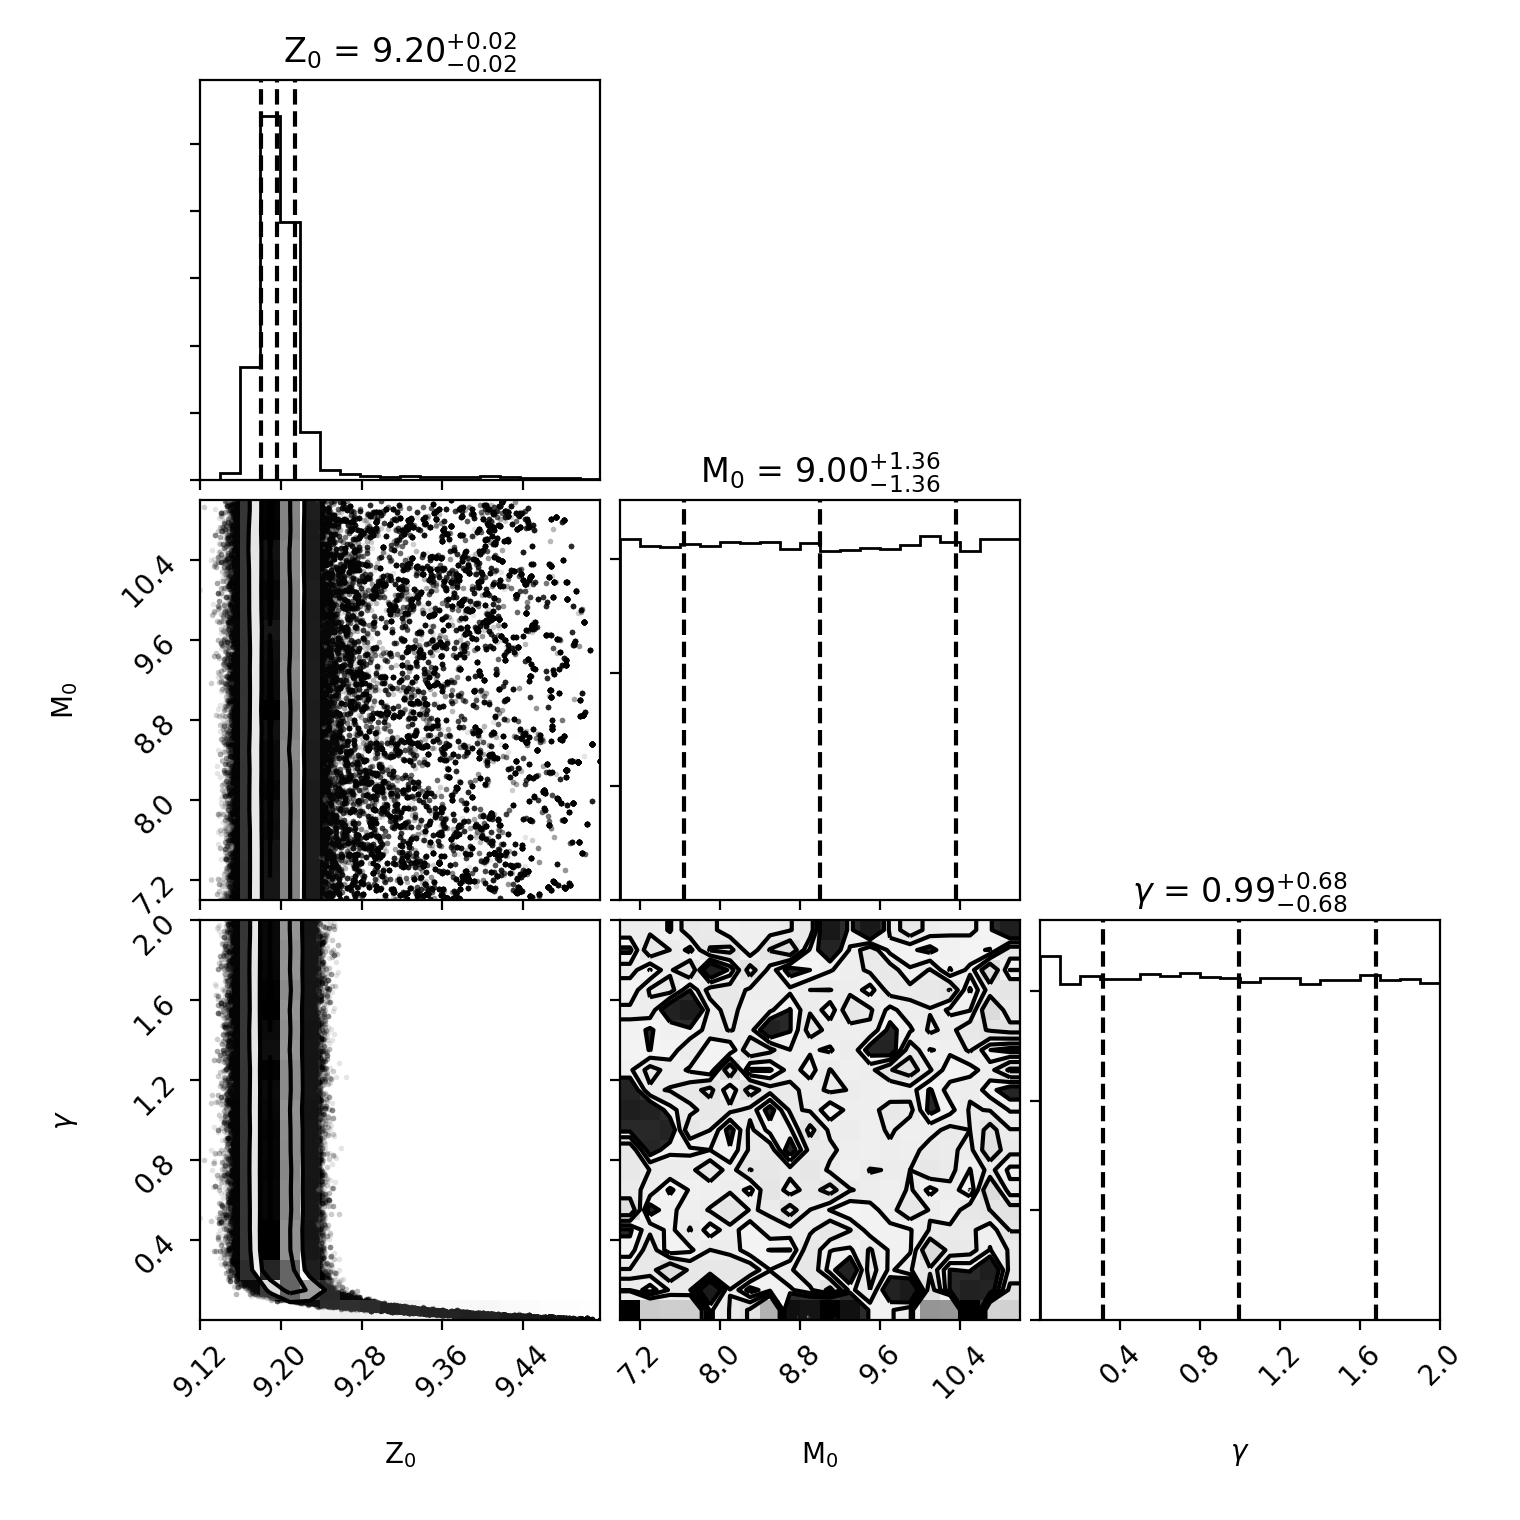

Z$_0$:    9.20$^9.18_9.21$
M$_0$:    9.00$^7.64_10.36$
$\gamma$: 0.99$^0.32_1.68$


In [7]:
# Plot results
fig,ax = plt.subplots(3,1)
c = plt.get_cmap('terrain')(np.linspace(0.5, 0.95, nwalkers))
for j in range(nwalkers):
    ax[0].plot(sampler.chain[j,:,0],color=c[j],linewidth=0.5)
    ax[1].plot(sampler.chain[j,:,1],color=c[j],linewidth=0.5)
    ax[2].plot(sampler.chain[j,:,2],color=c[j],linewidth=0.5)

samples = sampler.chain[:, 2500:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["Z$_0$","M$_0$", "$\gamma$"],quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,title_kwargs={"fontsize": 12})

# Return best metallicity, extinction and errors
mid_z0,lil_z0,big_z0 = np.percentile(samples[:,0],(50,16,84))
mid_m0,lil_m0,big_m0 = np.percentile(samples[:,1],(50,16,84))
mid_g,lil_g,big_g = np.percentile(samples[:,2],(50,16,84))

print('Z$_0$:    %0.2f$^%0.2f_%0.2f$'%(mid_z0,lil_z0,big_z0))
print('M$_0$:    %0.2f$^%0.2f_%0.2f$'%(mid_m0,lil_m0,big_m0))
print('$\gamma$: %0.2f$^%0.2f_%0.2f$'%(mid_g,lil_g,big_g))

In [80]:
### Using the other type just to be sure

In [14]:
# Define prior and likelihood
def lnprior(par):
    z0,g  = par 
    # Only using uniform priors
    if 5.0 < z0 < 10.0 and 0.0 < g < 4.0:
        return 0.0
    return -np.inf

def lnlike(par, mass, met, met_err):
    z0,g  = par
    met_model = z0 + g * np.log10(mass-10.)
    inv_sigma2 = 1.0/(met_err**2)
    return -0.5*(np.nansum((y-met_model)**2*inv_sigma2 - np.log(inv_sigma2)))


def lnprob(par, mass, met, meterr):
    z0,g  = par
    lp = lnprior(par)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(par, mass, met, meterr)

ndim, nwalkers = 2, 500

<IPython.core.display.Javascript object>


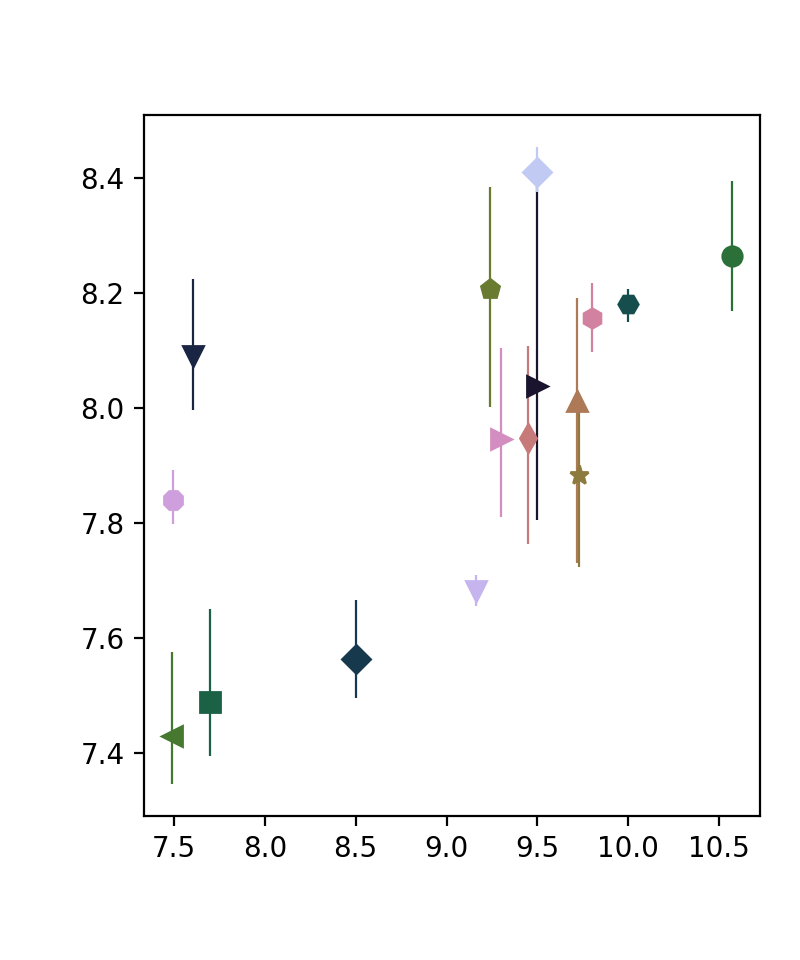

In [15]:
## direct metallicity
properties = Table.read('../Data/galaxy_properties.dat',format='ascii.fixed_width_two_line')
Te_met = Table.read('../TeMethod/direct_metallicity.dat',format='ascii.fixed_width_two_line')
properties.add_index('Name')
Te_met.add_index('Name')

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(properties['Name'])))

#plotting
fig, ax = plt.subplots(1,1,figsize=(4,4.8))
fig.subplots_adjust(bottom=0.15,left=0.18,right=0.95)

x = []
y = []
y_err = []
for i,gal in enumerate(properties):    
    ax.errorbar(gal['LogMass'],Te_met.loc[gal['Name']]["met"],
                yerr=np.array((Te_met.loc[gal['Name']]["lowmet"],Te_met.loc[gal['Name']]["upmet"])).reshape(2,1),
                color=colors[gal['nb']],marker=gal['marker'],
                markersize=7,elinewidth=0.8, zorder=10)  

    x.append(gal['LogMass'])
    y.append(Te_met.loc[gal['Name']]["met"])
    y_err.append(np.mean((Te_met.loc[gal['Name']]["lowmet"],Te_met.loc[gal['Name']]["upmet"])))

# make sure all  is an array
x = np.array(x)
y = np.array(y)
y_err = np.array(y_err)

    
# Initialise walkers
p0 = [np.array((x,y)) for x,y in zip(np.random.uniform(low=8.5, high=10.0, size=nwalkers),
                                         np.random.uniform(low=0.2, high=1.0, size=nwalkers))]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, y_err))        
out = sampler.run_mcmc(p0, 5000)

<IPython.core.display.Javascript object>


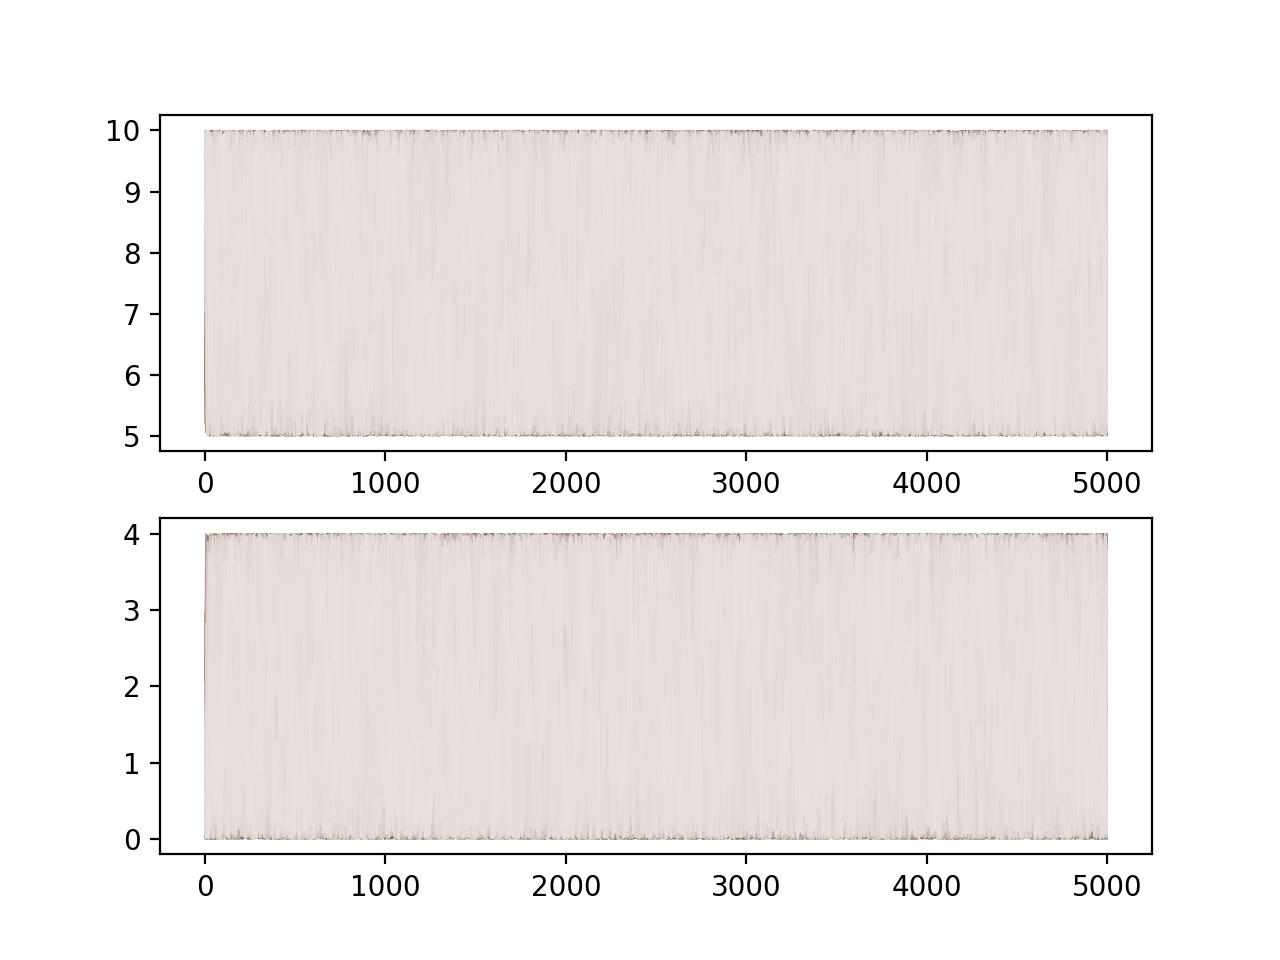

<IPython.core.display.Javascript object>


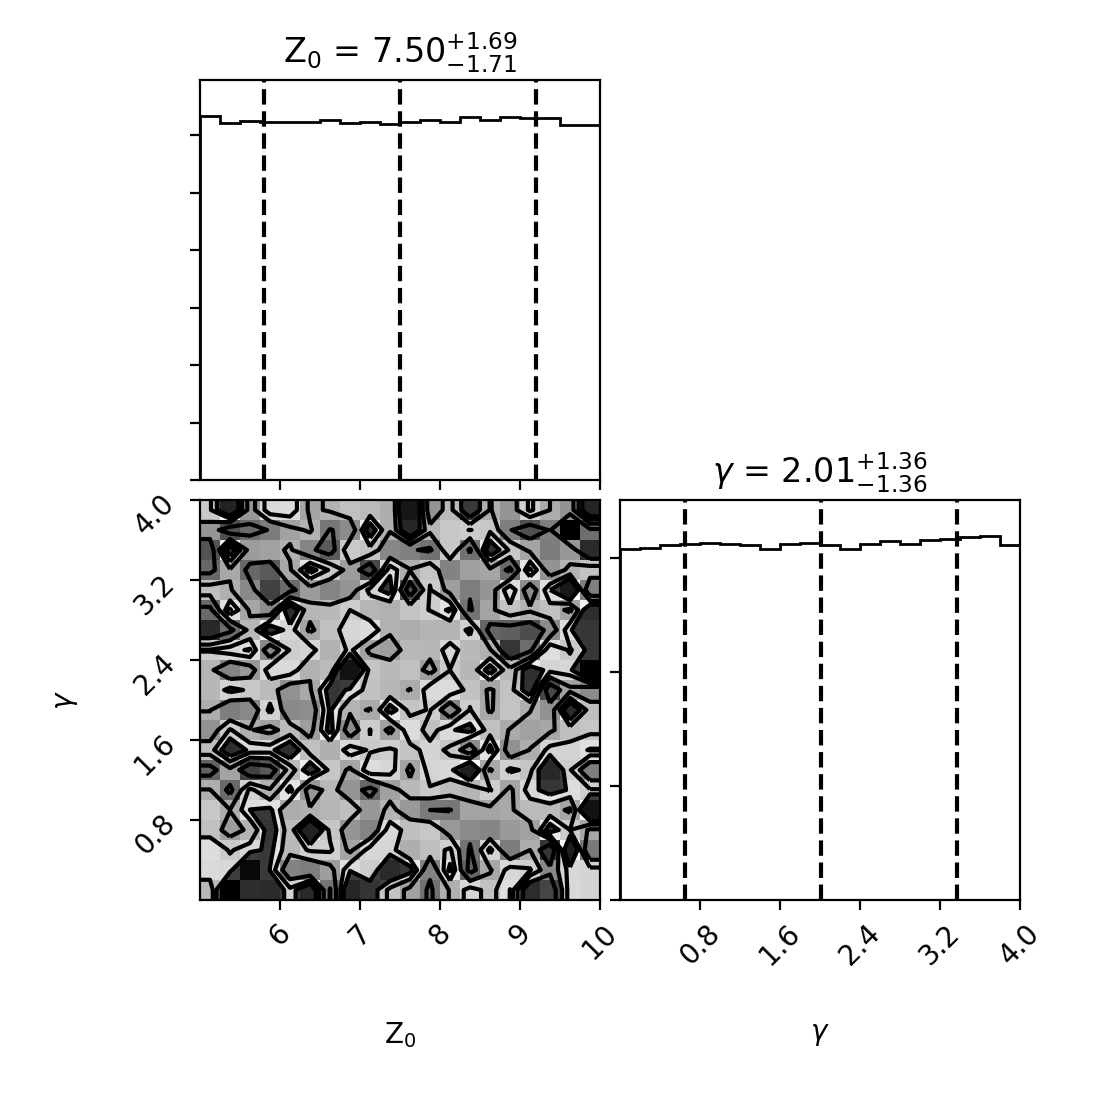

Z$_0$:    7.50$^5.80_9.20$
$\gamma$: 2.01$^0.65_3.37$


In [16]:
# Plot results
fig,ax = plt.subplots(2,1)
c = plt.get_cmap('terrain')(np.linspace(0.5, 0.95, nwalkers))
for j in range(nwalkers):
    ax[0].plot(sampler.chain[j,:,0],color=c[j],linewidth=0.5)
    ax[1].plot(sampler.chain[j,:,1],color=c[j],linewidth=0.5)

samples = sampler.chain[:, 2500:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["Z$_0$", "$\gamma$"],quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,title_kwargs={"fontsize": 12})

# Return best metallicity, extinction and errors
mid_z0,lil_z0,big_z0 = np.percentile(samples[:,0],(50,16,84))
mid_g,lil_g,big_g = np.percentile(samples[:,1],(50,16,84))

print('Z$_0$:    %0.2f$^%0.2f_%0.2f$'%(mid_z0,lil_z0,big_z0))
print('$\gamma$: %0.2f$^%0.2f_%0.2f$'%(mid_g,lil_g,big_g))